In [1]:
import pandas as pd
# load the dataset
df = pd.read_csv(r'C:\Users\HP\Downloads\household_power_consumption\household_power_consumption.txt', delimiter=';', low_memory=False)
# grab time series of electricity usage
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['electricity_usage'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df[['date_time', 'electricity_usage']].copy()
# set the index as and sort by date and time
df = df.set_index('date_time').sort_index()
# resample to hourly frequency
df_hour = df.resample('1H').mean()
# create shifted time series
df_hour['electricity_usage'] = df_hour['electricity_usage'].fillna(method='ffill')
df_hour['electricity_usage_1hr_lag'] = df_hour['electricity_usage'].shift()
df_hour['electricity_usage_2hr_lag'] = df_hour['electricity_usage'].shift(2)
df_hour['electricity_usage_3hr_lag'] = df_hour['electricity_usage'].shift(3)
df_hour['electricity_usage_4hr_lag'] = df_hour['electricity_usage'].shift(4)
df_hour['electricity_usage_5hr_lag'] = df_hour['electricity_usage'].shift(5)
df_hour['electricity_usage_6hr_lag'] = df_hour['electricity_usage'].shift(6)
df_hour['electricity_usage_7hr_lag'] = df_hour['electricity_usage'].shift(7)
df_hour['electricity_usage_8hr_lag'] = df_hour['electricity_usage'].shift(8)
# create month/seasonality as a feature
df_hour['month'] = df_hour.index.month
# drop missing data
df_hour = df_hour.dropna()
# split train test sets
sample_size = df_hour.shape[0] - 200
df_train = df_hour.iloc[:sample_size].copy()
df_test = df_hour.iloc[sample_size:].copy()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:

import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Microsoft-25199 (build 11.0.12+7, mixed mode)
  Starting server from c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\HP\AppData\Local\Temp\tmptdndtz8m
  JVM stdout: C:\Users\HP\AppData\Local\Temp\tmptdndtz8m\h2o_HP_started_from_python.out
  JVM stderr: C:\Users\HP\AppData\Local\Temp\tmptdndtz8m\h2o_HP_started_from_python.err
  Server is running at http://127.0.0.1:54361
Connecting to H2O server at http://127.0.0.1:54361 ... successful.


H2O_cluster_uptime:,10 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,2 months and 26 days
H2O_cluster_name:,H2O_from_python_HP_01dwj4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.916 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [3]:
h2o_frame = h2o.H2OFrame(df_train)
x = h2o_frame.columns
y = 'electricity_usage'
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
h2o_automl = H2OAutoML(sort_metric='mse', max_runtime_secs=5*60, seed=666)
h2o_automl.train(x=x, y=y, training_frame=h2o_frame)

AutoML progress: |
10:21:19.453: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_3_AutoML_1_20221005_102119

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.25045900217152217
RMSE: 0.5004587916817149
MAE: 0.3466496977631981
RMSLE: 0.21098445838859645
R^2: 0.6747106755954598
Mean Residual Deviance: 0.25045900217152217
Null degrees of freedom: 10047
Residual degrees of freedom: 10037
Null deviance: 7737.841923940112
Residual deviance: 2516.6120538194546
AIC: 14627.934323185214

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.3587627787778268
RMSE: 0.5989680949581763
MAE: 0.40878020806040816
RMSLE: 0.24898973060500398
R^2: 0.5491133105763019
Mean Residual Deviance: 0.3587627787778268
Null degrees of freedom

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.408744,0.002512,0.408778,0.407222,0.413076,0.407555,0.407089
1,mean_residual_deviance,0.358739,0.004335,0.357999,0.356344,0.366369,0.357025,0.355957
2,mse,0.358739,0.004335,0.357999,0.356344,0.366369,0.357025,0.355957
3,null_deviance,5528.984000,89.576180,5447.952600,5490.359000,5658.107000,5463.751500,5584.748000
4,r2,0.549090,0.005485,0.545613,0.551567,0.544461,0.546211,0.557599
5,residual_deviance,2492.893800,47.674416,2475.206000,2461.983400,2577.405500,2479.179700,2470.694800
6,rmse,0.598939,0.003606,0.598330,0.596946,0.605284,0.597515,0.596621
7,rmsle,0.248978,0.001206,0.249213,0.248226,0.250854,0.248908,0.247686


In [5]:

h2o_models = h2o.automl.get_leaderboard(h2o_automl, extra_columns = "ALL")
h2o_models

model_id,mse,rmse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_3_AutoML_1_20221005_102119,0.358763,0.598968,0.40878,0.24899,0.358763,1656,0.127163,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20221005_102119,0.358865,0.599054,0.408867,0.249005,0.358865,1110,0.052204,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20221005_102119,0.35898,0.59915,0.409286,0.249009,0.35898,1076,0.051293,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20221005_102119,0.359188,0.599323,0.409442,0.249192,0.359188,914,0.031128,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20221005_102119,0.35963,0.599692,0.410369,0.2493,0.35963,767,0.025787,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20221005_102119,0.360317,0.600264,0.411528,0.249621,0.360317,1049,0.026964,StackedEnsemble
GBM_1_AutoML_1_20221005_102119,0.360923,0.600769,0.412772,0.250035,0.360923,2781,0.023837,GBM
GBM_2_AutoML_1_20221005_102119,0.36299,0.602487,0.414703,0.25077,0.36299,1468,0.016831,GBM
GBM_5_AutoML_1_20221005_102119,0.364925,0.60409,0.415846,0.251595,0.364925,1286,0.017882,GBM
GBM_3_AutoML_1_20221005_102119,0.364999,0.604151,0.414597,0.251019,0.364999,2032,0.020936,GBM


In [6]:
from h2o.model.regression import h2o_mean_squared_error

h2o_frame_test = h2o.H2OFrame(df_test)

y_pred = h2o_automl.predict(h2o_frame_test)
y_actual = h2o.H2OFrame(df_test[['electricity_usage']])

h2o_mean_squared_error(y_actual, y_pred)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0.2979081719013444

<AxesSubplot:xlabel='date_time'>

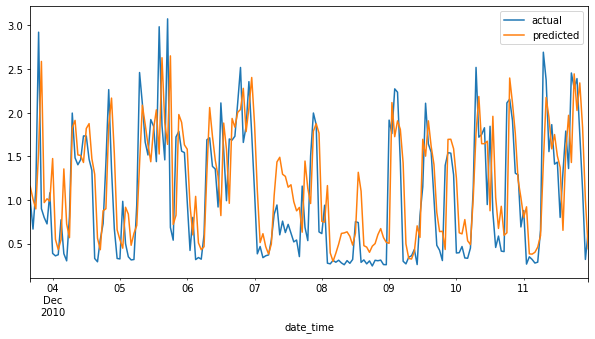

In [7]:
h2o_compare = pd.DataFrame(data={'actual': df_test['electricity_usage'], 'predicted': y_pred.as_data_frame().to_numpy().ravel()})
h2o_compare.plot(figsize=(10, 5))

In [8]:
from tpot import TPOTRegressor

tpot_automl = TPOTRegressor(generations=10, population_size=10, 
                            verbosity=2, scoring='neg_mean_squared_error',   
                            max_time_mins=5, random_state = 666)

In [9]:
X_train = df_train.drop(columns='electricity_usage')
y_train = df_train['electricity_usage']

In [10]:
tpot_automl.fit(X_train, y_train)


5.11 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RidgeCV(input_matrix)


TPOTRegressor(generations=10, max_time_mins=5, population_size=10,
              random_state=666, scoring='neg_mean_squared_error', verbosity=2)

In [11]:
X_test = df_test.drop(columns='electricity_usage')
y_test = df_test['electricity_usage']

tpot_automl.score(X_test, y_test)

-0.2989048361957452

In [12]:
from sklearn.metrics import mean_squared_error

y_pred = tpot_automl.predict(X_test)
mean_squared_error(y_test, y_pred)

0.2989048361957452

<AxesSubplot:xlabel='date_time'>

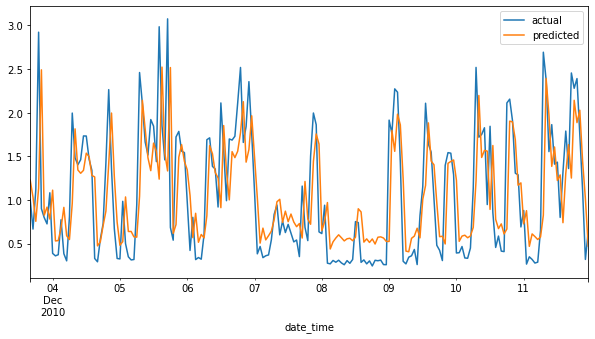

In [13]:
tpot_compare = pd.DataFrame(data={'actual': df_test['electricity_usage'], 'predicted': y_pred})
tpot_compare.plot(figsize=(10, 5))